In [2]:
using PlotlyJS
using Statistics
using BenchmarkTools
using DataFrames
using JSON
using StatsBase
using Random
using Distributions
using KernelDensity
using ProgressBars
using CSV
using DataFramesMeta
using PlotlyBase
using DataStructures

include("armcalibrate.jl")
include("ARM.jl")

paramMap (generic function with 1 method)

## Simulations

### Comparing Parameters for Random Simulations

In [3]:
sims = simulate(1000, 100, 500, false, false, [-1., -1., -1.])
id_sims = getAvgResults(sims);

sims = simulate(1000, 100, 500, true, false, [-1., -1., -1.])
ad_sims = getAvgResults(sims);

sims = simulate(1000, 100, 500, false, true, [-1., -1., -1.])
h_sims = getAvgResults(sims);

sims = simulate(1000, 100, 500, true, true, [-1., -1., -1.])
ad_h_sims = getAvgResults(sims);

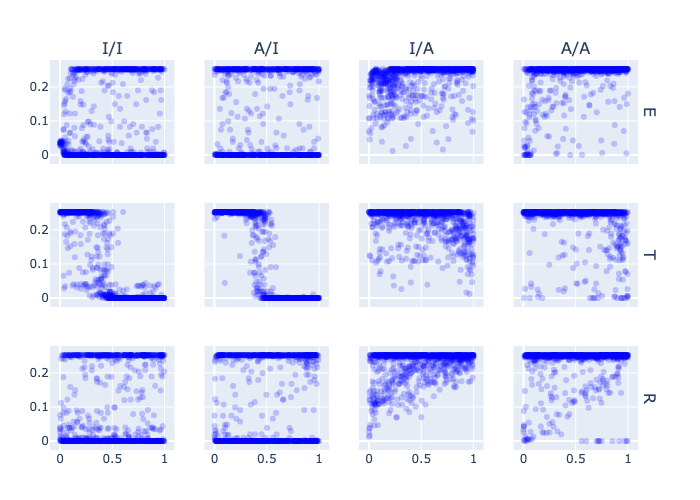

In [4]:
p = make_subplots(
      rows=3, 
      cols=4, 
      shared_xaxes=true,
      shared_yaxes=true,
      column_titles=["I/I", "A/I", "I/A", "A/A"],
      row_titles=["E", "T", "R"]
    )

add_trace!(p, scatter(x=[s[1] for s in id_sims], y=[s[4][500] for s in id_sims], mode="markers", marker=attr(opacity=.2), marker_color="blue"), row=1, col=1)
add_trace!(p, scatter(x=[s[1] for s in h_sims], y=[s[4][500] for s in h_sims], mode="markers", marker=attr(opacity=.2), marker_color="blue"), row=1, col=2)
add_trace!(p, scatter(x=[s[1] for s in ad_sims], y=[s[4][500] for s in ad_sims], mode="markers", marker=attr(opacity=.2), marker_color="blue"), row=1, col=3)
add_trace!(p, scatter(x=[s[1] for s in ad_h_sims], y=[s[4][500] for s in ad_h_sims], mode="markers", marker=attr(opacity=.2), marker_color="blue"), row=1, col=4)

add_trace!(p, scatter(x=[s[2] for s in id_sims], y=[s[4][500] for s in id_sims], mode="markers", marker=attr(opacity=.2), marker_color="blue"), row=2, col=1)
add_trace!(p, scatter(x=[s[2] for s in h_sims], y=[s[4][500] for s in h_sims], mode="markers", marker=attr(opacity=.2), marker_color="blue"), row=2, col=2)
add_trace!(p, scatter(x=[s[2] for s in ad_sims], y=[s[4][500] for s in ad_sims], mode="markers", marker=attr(opacity=.2), marker_color="blue"), row=2, col=3)
add_trace!(p, scatter(x=[s[2] for s in ad_h_sims], y=[s[4][500] for s in ad_h_sims], mode="markers", marker=attr(opacity=.2), marker_color="blue"), row=2, col=4)

add_trace!(p, scatter(x=[s[3] for s in id_sims], y=[s[4][500] for s in id_sims], mode="markers", marker=attr(opacity=.2), marker_color="blue"), row=3, col=1)
add_trace!(p, scatter(x=[s[3] for s in h_sims], y=[s[4][500] for s in h_sims], mode="markers", marker=attr(opacity=.2), marker_color="blue"), row=3, col=2)
add_trace!(p, scatter(x=[s[3] for s in ad_sims], y=[s[4][500] for s in ad_sims], mode="markers", marker=attr(opacity=.2), marker_color="blue"), row=3, col=3)
add_trace!(p, scatter(x=[s[3] for s in ad_h_sims], y=[s[4][500] for s in ad_h_sims], mode="markers", marker=attr(opacity=.2), marker_color="blue"), row=3, col=4)

relayout!(
      p, 
      showlegend=false, 
      width=900, 
      height=800,
      barmode="overlay",
      xaxis_titles="steps"
    )

p

### Simulation Based Inference

In [5]:
id_truth = getAvgResults(simulate(1, 100, 2500, false, true, [.25, .25, .25]))
af_truth = getAvgResults(simulate(1, 100, 2500, false, true, [.25, .25, .25]));

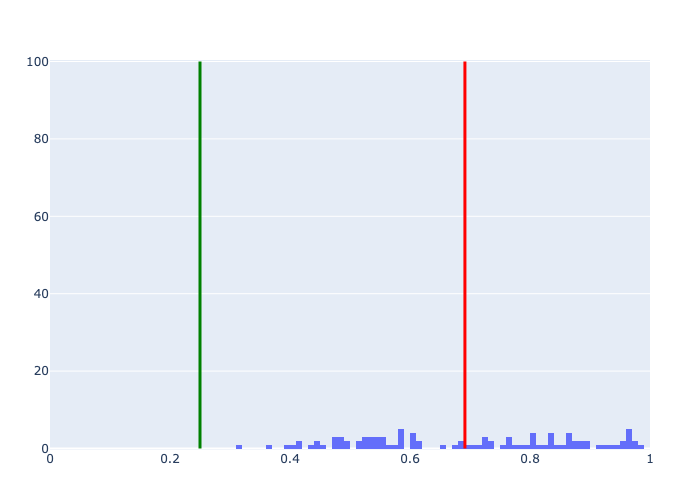

In [6]:
posterior = abc(id_truth, 100, .1, false, false, [-1., .25, .25])
plot_posterior(posterior, .25)

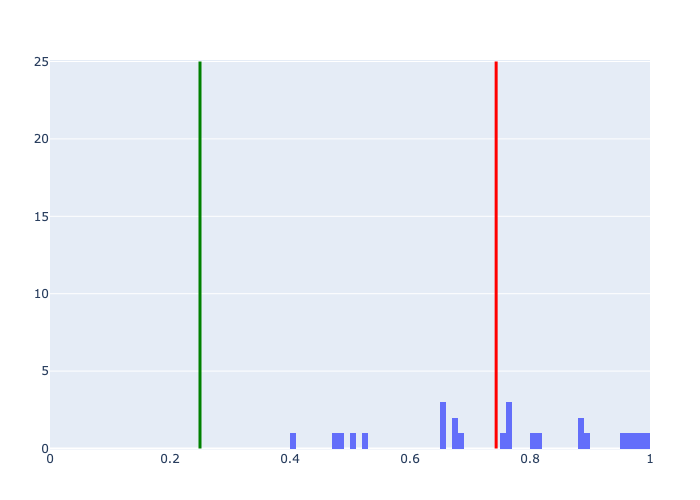

In [7]:
posterior = metropolis_hastings(id_truth, 25, 1000, false, false, [-1., .25, .25])
plot_posterior(posterior, .25)

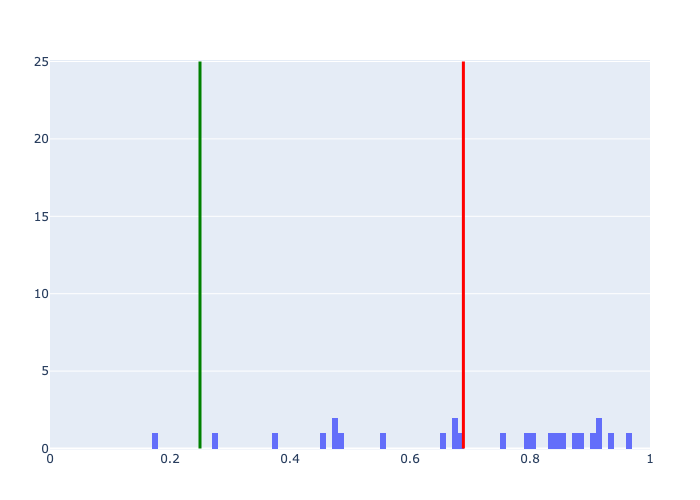

In [8]:
posterior = metropolis_hastings(af_truth, 25, 1000, true, false, [-1., .25, .25])
plot_posterior(posterior, .25)